In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data
from FLAME import FLAME
clusterer = FLAME(cluster_neighbors=20, iteration_neighbors=20, verbose=0)
clusterer = clusterer.fit(X)
pred = clusterer.labels_
df = pd.DataFrame(X, columns=iris.feature_names)
df["pred"] = pred
df["true"] = iris.target
g = sns.pairplot(df, hue="pred", size=5, plot_kws={"marker":"+","s":10})

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        if i!=j:
            g.axes[j,i].yaxis.set_label_text(ylabels[j])
        else:
            g.axes[j,i].yaxis.set_label_text("frequency")
plt.savefig("scatter_matrix.png")

In [ ]:
probapd = pd.DataFrame(clusterer.membership_proba_, columns=["prob0","prob1","prob2","prob-1"])
df = pd.concat([df, probapd], axis=1)

In [ ]:
df[df.pred != df.true]

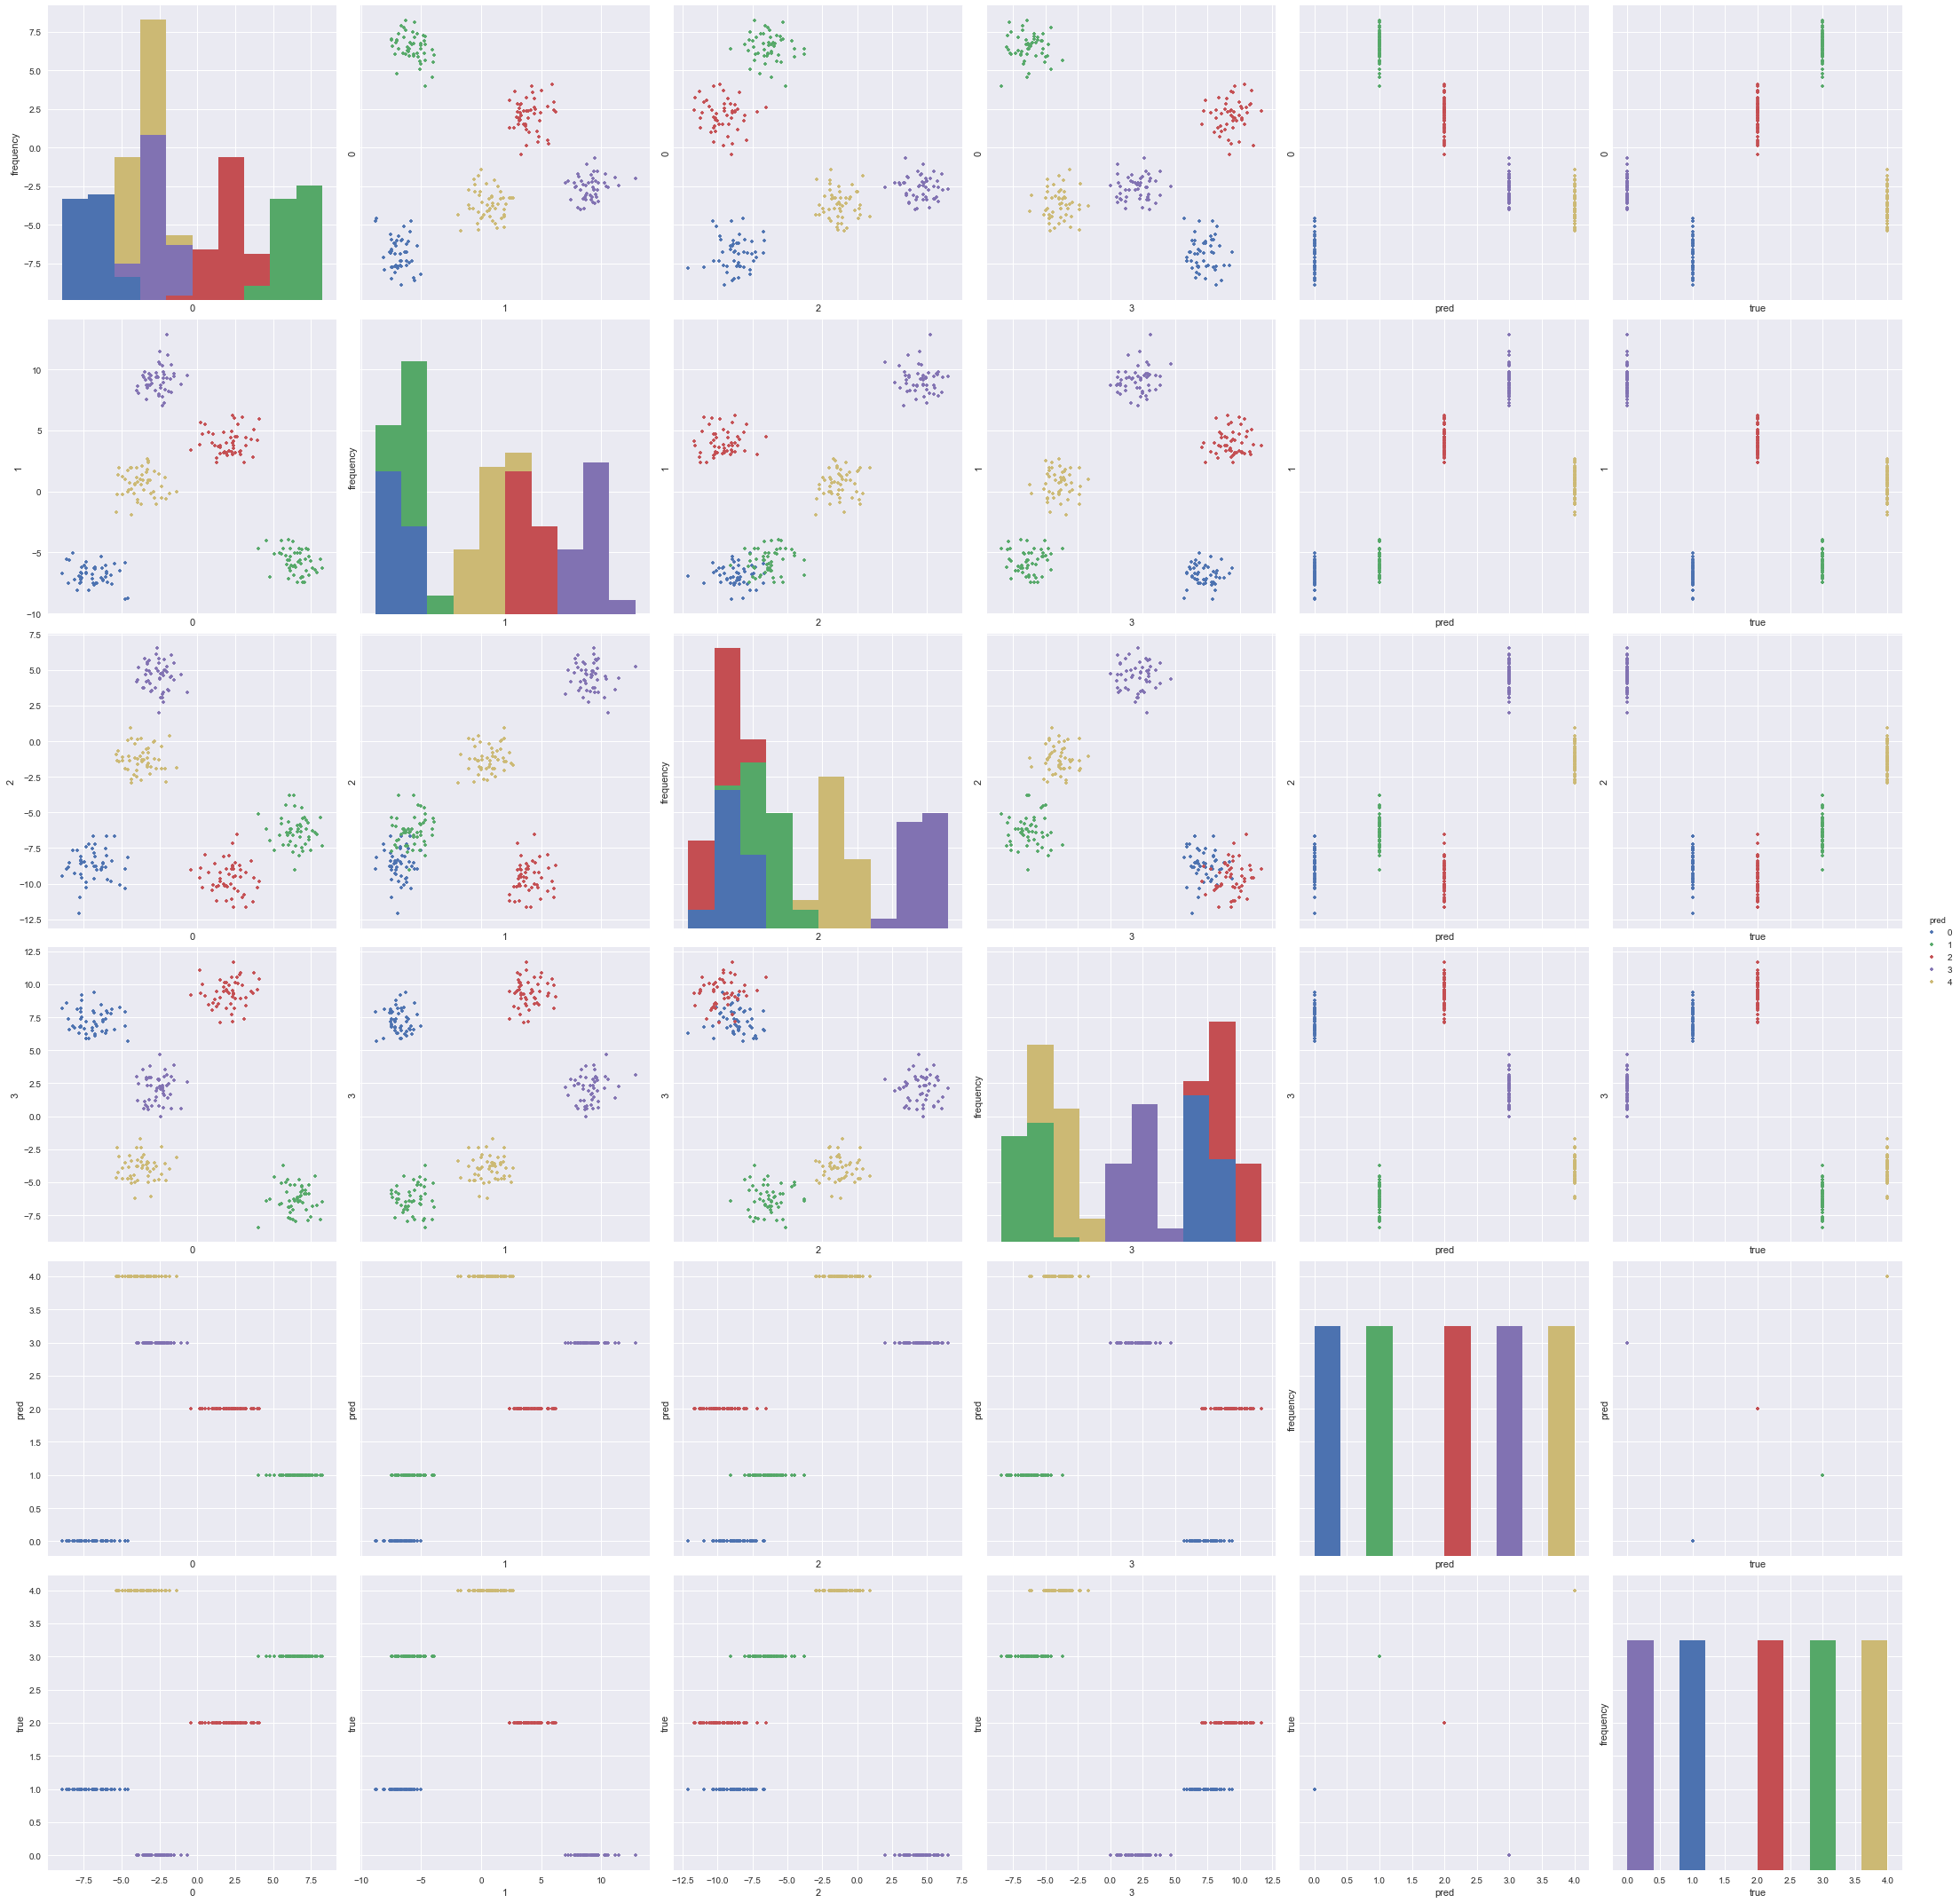

In [7]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=250, centers=5, n_features=4, random_state=42)
from FLAME import FLAME
clusterer = FLAME(cluster_neighbors=20, iteration_neighbors=20, verbose=0, thd=-3)
clusterer = clusterer.fit(X)
pred = clusterer.labels_
df = pd.DataFrame(X)
df["pred"] = pred
df["true"] = Y
g = sns.pairplot(df, hue="pred", size=5, plot_kws={"marker":"+","s":10})

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        if i!=j:
            g.axes[j,i].yaxis.set_label_text(ylabels[j])
        else:
            g.axes[j,i].yaxis.set_label_text("frequency")
plt.savefig("scatter_matrix_blobs.png")